In [11]:
import numpy as np
import networkx as nx
from collections import Counter
from itertools import combinations
from kervis.dataset import Dataset
from matplotlib import pyplot as plt
from kervis.utils import fetch_dataset
from grakel.kernels import GraphletSampling

In [12]:
G1 = nx.Graph()
G1.add_node(0, label=0)
G1.add_node(1, label=0)
G1.add_node(2, label=0)
G1.add_node(3, label=0)
G1.add_node(4, label=1)
G1.add_node(5, label=1)
G1.add_node(6, label=1)
G1.add_edges_from([
     (0,3),
     (1,3),
     (2,3),
     (3,4),
     (4,5),
     (4,6)])

G2 = nx.Graph()
G2.add_node(7, label=0)
G2.add_node(8, label=0)
G2.add_node(9, label=0)
G2.add_node(10, label=0)
G2.add_node(11, label=1)
G2.add_node(12, label=1)
G2.add_node(13, label=1)
G2.add_edges_from([
     (7,10),
     (8,10),
     (9,10),
     (10,11),
     (11,12),
     (11,13),
     (7,12),
     (9,13)])

In [13]:
k = 5

MUTAG = fetch_dataset("MUTAG", verbose=False)
GS = GraphletSampling(k)
GS.fit_transform(MUTAG.data)
GS._phi_X

array([[ 48.,  24.,   0.,   0.],
       [ 26.,  16.,   0.,   0.],
       [ 32.,  17.,   0.,   0.],
       [ 68.,  37.,   1.,   0.],
       [ 18.,  11.,   0.,   0.],
       [ 84.,  45.,   0.,   0.],
       [ 35.,  19.,   0.,   0.],
       [ 52.,  28.,   2.,   0.],
       [ 23.,  10.,   2.,   0.],
       [ 43.,  25.,   2.,   0.],
       [ 52.,  27.,   0.,   0.],
       [ 63.,  30.,   0.,   0.],
       [ 75.,  43.,   2.,   0.],
       [ 26.,  19.,   2.,   0.],
       [ 71.,  37.,   0.,   0.],
       [ 78.,  45.,   2.,   0.],
       [ 21.,  15.,   0.,   0.],
       [ 45.,  28.,   2.,   0.],
       [ 24.,  13.,   0.,   0.],
       [ 49.,  26.,   2.,   0.],
       [ 38.,  21.,   0.,   0.],
       [ 45.,  24.,   2.,   0.],
       [ 86.,  47.,   2.,   0.],
       [136.,  69.,   0.,   0.],
       [ 45.,  24.,   2.,   0.],
       [ 21.,  16.,   0.,   0.],
       [ 90.,  45.,   0.,   0.],
       [ 45.,  24.,   2.,   0.],
       [ 69.,  45.,   2.,   0.],
       [ 87.,  45.,   2.,   0.],
       [ 8

In [14]:
GS._graph_bins

{0: <grakel.kernels._isomorphism.bliss.Graph at 0x10577e490>,
 1: <grakel.kernels._isomorphism.bliss.Graph at 0x1581a7790>,
 2: <grakel.kernels._isomorphism.bliss.Graph at 0x1580fc460>,
 3: <grakel.kernels._isomorphism.bliss.Graph at 0x15815c1c0>}

21


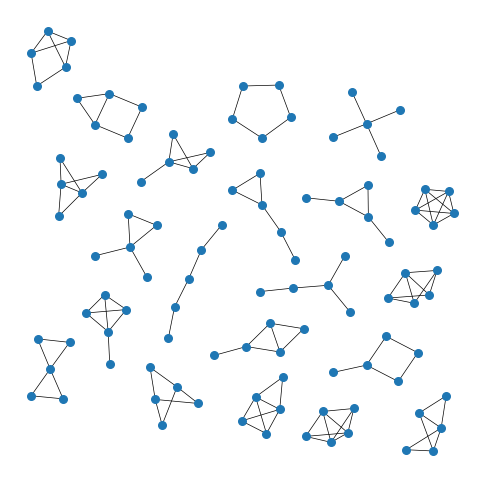

In [22]:
graphlets = [g for g in nx.graph_atlas_g() if len(g.nodes())==k and len(list(nx.connected_components(g)))==1] # and len(list(nx.connected_components(g)))==1
print(len(graphlets))

graphlets_G = nx.Graph()
for index, graphlet in enumerate(graphlets):  
    graphlets_G.add_nodes_from(np.array(graphlet.nodes())+index*k)
    graphlets_G.add_edges_from(np.array(graphlet.edges())+index*k)

plt.figure(figsize=(6, 6))
plt.margins(0.0)
pos = nx.nx_agraph.pygraphviz_layout(graphlets_G)
nx.draw(graphlets_G, pos=pos, node_color="tab:blue", width=0.5, node_size=30)

In [16]:
dataset = Dataset("MUTAG")

# features = []
# graph = dataset.graphs[0]

# for graph in dataset.graphs:
#     feature = []
#     C = combinations(list(graph), k)
#     for c in C:
#         for i in range(len(graphlets)):
#             if nx.is_isomorphic(graph.subgraph(c), graphlets[i]):
#                 feature.append((c, i))

#     features.append(feature)

# print(features)

In [17]:
import concurrent.futures

def get_feature(graph):
    feature = []
    C = combinations(list(graph), k)
    for c in C:
        for i in range(len(graphlets)):
            if nx.is_isomorphic(graph.subgraph(c), graphlets[i]):
                feature.append((c, i))

    return feature

with concurrent.futures.ThreadPoolExecutor(max_workers=20) as executor:
    futures = {executor.submit(get_feature, graph) for graph in dataset.graphs}
    results = []
    for future in concurrent.futures.as_completed(futures):
        results.append(future.result())

print(results)

In [18]:
# import multiprocessing

# pool = multiprocessing.Pool()

# results = pool.map(get_feature, dataset.graphs)

# # Output the results
# for result in results:
#     print(result)

In [19]:
# import concurrent.futures

# def task(n):
#     return n ** 2

# # Use a dictionary to keep track of futures and their corresponding order
# futures = {}
# with concurrent.futures.ProcessPoolExecutor() as executor:
#     for i, n in enumerate(range(10)):
#         future = executor.submit(task, n)
#         futures[future] = i

# # Then sort the results based on this order
# results = []
# for future in concurrent.futures.as_completed(futures):
#     order = futures[future]
#     results.append((order, future.result()))

# results.sort()  # Sort the results based on the order

# # Extract the results only (we no longer need the order)
# results = [result for _, result in results]